Project How to Make a Banger (song)

# Overview

This project analyzes the relationship between technical song characteristics and song popularity, as measured by total number of streams. The initial search for a dataset began on the Spotify R&D page, but ultimately three datasets compiled from Kaggle research competitions were selected.

These datasets were cleaned, normalized, and merged to create a single, usable dataset. The analysis involved examining the distributions of song characteristics, grouped by whether or not the songs were classified as popular. Additionally, Pearson correlation coefficients, t-test values, and p-values were calculated to evaluate the relationships between variables. Our final conclusions are:

<a id='research_question'></a>
# Research Question

What criteria should be met in order for an up and coming artist to make it in the music industry? More specifically what musical style elements result in the most Spotify streams for artists?

<a id='background'></a>

## Background & Prior Work

Music has been around for centuries and with the advancement of modern technology, just about anyone can make music thus making it an oversaturated industry for an individual to be successful in. There are many rewards that come with being a successful artist such as the money, fame, and the ability to motivate and inspire millions of people around the world. We are essentially asking what features of a song result in the most streams for an up and coming artist and make it big in a field that is jam-packed with hundreds of thousands of people. Through extensive research, we have discovered some basic elements of a song that are essential for an artist to have in order to obtain the most amount of streams possible. 

In today's current stage of technology, there are actually a few key elements of a song that are connected to a high volume of streams. When making a song, there are thirteen different elements that an artist should consider when making a song. Spotify keeps datasets for these thirteen different elements and are available for people to scroll view. This data allows people to objectify music and analyze it to figure out interesting patterns that may be useful. According to user experience designer Asrith Sherry, in his article, “What Makes a Song Likable?”, he explores Spotify’s datasets containing these thirteen different features and performs statistical analysis in order to discover which features result in a song receiving the most streams. After thorough analysis of the “ Top Spotify Tracks of 2017”, Asrith created a radar chart that depicted each song that was charted based off of six different parameters. In conclusion, the elements that were most valuable for a song were danceability, energy, and valence. 

Continuing on the several different elements that may predict the number of streams a song may get, the length of the seems to matter as well. Today, streaming music is what is used to judge the popularity of an artist, with the more streams, the more popular the artist. According to Zachary Mack, in his article, “How Streaming Affects the Lengths of Songs”, he edits an interview between songwriter Charlie Harding and musicologist Nate Sloan explaining how songs have gotten shorter in length when compared to the past. He notes that in the past, “songs that were coming in at four minutes and 30 seconds. Today, songs are down to three minutes and 42 seconds.” With this knowledge, artists are able to identify an optimal time length for their song in order to be able to achieve a high number of streams. 																	

References:	

-https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404?gi=528571d1bae3 

-https://www.theverge.com/2019/5/28/18642978/music-streaming-spotify-song-length-distribution-production-switched-on-pop-vergecast-interview


# Hypothesis


The working hypothesis is that there is a strong correlation between song characteristics and total streams. Such a correlation would suggest that certain audio features can serve as predictors of a song’s popularity. 

# Dataset(s)

- Dataset Name: 2000song.csv
- Link to the dataset: https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset
- Number of observations: 2000

In this dataset Spotify's 2000 most streamed songs are collected and compiled. Along with the name and artist of each song are information for other descriptive variables of the songs.

- Dataset Name: 116ksong.csv
- Link to the dataset: https://www.kaggle.com/tomigelo/spotify-audio-features
- Number of observations: 130663 

In this dataset 130 thousand of Spotify's random featured songs have been pulled from their service and recorded. Similarly to the above datase the name and artist of each song are information for other descriptive variables of the songs. With this set we look to compare the attributes of those in the top 2000 to those which are not.

- Dataset Name: charts.csv
- Link to the dataset: https://www.kaggle.com/sashankpillai/spotify-top-200-charts-20202021
- Number of observations: 1556

This dataset displays a list of songs that made it to country specific spotify top 200 charts between 2020 and 2021. This dataset includes information such as highest charting position, number of times charted, when it charted the highest, number of streams, artist, amount of artist followers, genre, release date, as well as scores regarding danceability, energy, loudness, speechiness, acousticness, etc that were calculated and recorded by the spotify platform and API. We will use this dataset along with the other two to give us a working numerical value of popularity by number of streams.  


In [503]:
#!pip3 install pandas numpy matplotlib seaborn patsy statsmodels scipy

In [504]:
# import pandas library
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
# import numpy library
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# Import seaborn - will change style later
import seaborn as sns


# Statmodels & patsy 
from patsy import dmatrices
import statsmodels.api as sm

import scipy as sp
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest



# Setup

# Data Cleaning

In [505]:
# Here we ar first reading in our data.
hundf = pd.read_csv("data/2000song.csv")
moredf = pd.read_csv('data/116ksong.csv')
songs = pd.read_csv("data/charts.csv")

In this first data set there are 2000 observations representing the 2000 most streamed songs on Spotify. 
The variables to focus on are title,artist, bpm, energy, loudness(.dB), length(ms),acousticness,song duration and speechiness, which were calculated and recorded directly by the spotify platform/API.

Since the first data set represents the top 2000 streamed songs on spotify. From the second dataset it will be focused on songs which are not considered part of the top 2000 to make a comparison.

The third dataset features gives us a quanifiable value "streams" to replace and represent the variable "popularity" which is featured in the first two datasets.

In [506]:
#Quick look at what is inside dataset 1
hundf.head(3)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [507]:
#Quick look at what is inside dataset 2
moredf.head(3)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.01,0.74,238373,0.34,0.00,1,0.08,-7.68,1,0.41,203.93,4,0.12,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02,0.85,214800,0.56,0.00,8,0.29,-7.26,1,0.46,159.01,4,0.37,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.03,0.60,138913,0.72,0.00,9,0.08,-5.89,0,0.05,114.97,4,0.38,56


In [508]:
#Quick look at what is inside dataset 3
songs.head(3)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A


To work with our data sets we need to create a uniform for them. First we will clean up the column names and isolate for the variables we are interested in. 

In [509]:
#This reordered our variables and eliminated characteristics we are not interested in.
hundf = hundf[['Title','Artist','Beats Per Minute (BPM)','Energy','Loudness (dB)','Liveness','Valence','Length (Duration)','Acousticness','Speechiness']]
moredf = moredf[['track_name','artist_name','tempo','energy','loudness','liveness','valence','duration_ms','acousticness','speechiness']]
songs = songs[['Song Name','Artist','Streams']]

hundf.rename(columns={'Title': 'song_name','Artist': 'song_artist','Beats Per Minute (BPM)':'BPM','Energy':'energy','Loudness (dB)':'loudness','Liveness':'liveness','Valence':'valence', 'Length (Duration)':'song_duration','Acousticness':'acousticness','Speechiness':'speechiness'}, inplace=True)
moredf.rename(columns={'track_name': 'song_name','artist_name': 'song_artist','tempo':'BPM','duration_ms':'song_duration'}, inplace=True)
songs.rename(columns={'Song Name':'song_name','Artist':'artist_name'},inplace=True)


In [510]:
hundf.head(3)

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness
0,Sunrise,Norah Jones,157,30,-14,11,68,201,94,3
1,Black Night,Deep Purple,135,79,-11,17,81,207,17,7
2,Clint Eastwood,Gorillaz,168,69,-9,7,52,341,2,17


In [511]:
moredf.head(3)

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness
0,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",YG,203.93,0.34,-7.68,0.08,0.12,238373,0.01,0.41
1,BAND DRUM (feat. A$AP Rocky),YG,159.01,0.56,-7.26,0.29,0.37,214800,0.02,0.46
2,Radio Silence,R3HAB,114.97,0.72,-5.89,0.08,0.38,138913,0.03,0.05


In [512]:
songs.head(3)

,song_name,artist_name,Streams
0,Beggin',Måneskin,"48,633,449"
1,STAY (with Justin Bieber),The Kid LAROI,"47,248,719"
2,good 4 u,Olivia Rodrigo,"40,162,559"


Both data sets were made using the same Spotify API thus the values of each column are calculated in a standard way across the data sets. However the values in some columns were manipulated to better serve the purpose of their original creator.
Next, in order to make the datasets for uniformed will look for one song that is contained in both datasets then adjust values accordingly to uniform both sets.

In [513]:
for i in range(len(hundf.song_name)):
    if 'bad guy' == hundf.song_name[i]:
        indx = i
hundf.iloc[indx]

song_name              bad guy
song_artist      Billie Eilish
BPM                        135
energy                      43
loudness                   -11
liveness                    10
valence                     56
song_duration              194
acousticness                33
speechiness                 38
Name: 786, dtype: object

In [514]:
for i in range(len(moredf.song_name)):
    if 'bad guy' == moredf.song_name[i]:
        indx = i
moredf.iloc[indx]

song_name              bad guy
song_artist      Billie Eilish
BPM                     131.93
energy                    0.42
loudness                -11.00
liveness                  0.10
valence                   0.58
song_duration           194088
acousticness              0.31
speechiness               0.37
Name: 99368, dtype: object

In [515]:
# Dataset one will be set to match values of dataset two witht the following functions.This is because it will be easier to visualize.
hundf['song_duration'] = hundf['song_duration'].apply(pd.to_numeric, downcast='float', errors='coerce')
moredf['song_duration'] = moredf['song_duration'].apply(pd.to_numeric, downcast='float', errors='coerce')
def standardize_BPM(val):
    try:
        output = val * .97722963 
       
    except:
        output = np.nan
        
    return output

def standardize_loud(val):
    try:
        output = val / 1.0001851
       
    except:
        output = np.nan
        
    return output
# Dataset two will be set to match values of dataset one with the following functions. This is because it will be easier to visualize.
def standardize_energy(val):
    try:
        output = val * 102.8708134
  
    except:
        output = np.nan
        
    return output
def standardize_live(val):
    try:
        output = val * 100
    
    except:
        output = np.nan
        
    return output
def standardize_valence(val):
    try:
        output = (val * 100)- 1.8
       
    except:
        output = np.nan
        
    return output 

def standardize_dur(val):
    try:
        output = int(val / 1000.4536)
       
    except:
        output = np.nan
        
    return output  

def standardize_acou(val):
    try:
        output = val * 107.142857
      
    except:
        output = np.nan
        
    return output 

def standardize_speech(val):
    try:
        output = val * 103.26086
      
    except:
        output = np.nan
        
    return output 
# Now we will run the functions
hundf['BPM'] = hundf['BPM'].apply(standardize_BPM)
hundf['loudness'] = hundf['loudness'].apply(standardize_loud)
moredf['energy'] = moredf['energy'].apply(standardize_energy)
moredf['liveness'] = moredf['liveness'].apply(standardize_live)
moredf['valence'] = moredf['valence'].apply(standardize_valence)
moredf['song_duration'] = moredf['song_duration'].apply(standardize_dur)
moredf['acousticness'] = moredf['acousticness'].apply(standardize_acou)
moredf['speechiness'] = moredf['speechiness'].apply(standardize_speech)

hundf.dtypes

song_name         object
song_artist       object
BPM              float64
energy             int64
loudness         float64
liveness           int64
valence            int64
song_duration    float32
acousticness       int64
speechiness        int64
dtype: object

To make sure our functions worked correctly let us revisit our chosen song and compare the reworked values.

In [516]:
for i in range(len(moredf.song_name)):
    if 'bad guy' == moredf.song_name[i]:
        indx = i
Billie2 = moredf.iloc[indx]
for i in range(len(hundf.song_name)):
    if 'bad guy' == hundf.song_name[i]:
        indx = i
Billie1 = hundf.iloc[indx]
print(Billie1)
print(Billie2)

song_name              bad guy
song_artist      Billie Eilish
BPM                     131.93
energy                      43
loudness                -11.00
liveness                    10
valence                     56
song_duration           194.00
acousticness                33
speechiness                 38
Name: 786, dtype: object
song_name              bad guy
song_artist      Billie Eilish
BPM                     131.93
energy                   43.00
loudness                -11.00
liveness                 10.00
valence                  56.00
song_duration              194
acousticness             33.00
speechiness              38.00
Name: 99368, dtype: object


In [517]:
hundf = hundf.round(2)
hundf = hundf.dropna()
moredf = moredf.round(2)
moredf = moredf.dropna()


Now we want to merge our datasets in the event we want to do some manipulations later.

In [518]:
hundf['top2000']= True
moredf['top2000'] = False

jointdataf = [hundf,moredf]
jointdf = pd.concat(jointdataf)

In [519]:
jointdf.song_name.duplicated()
jointdf = jointdf.drop_duplicates(subset=['song_name'])
jointdf = jointdf[jointdf.song_duration != 0]
jointdf.loc[jointdf['song_name'] == 'bad guy']

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness,top2000
786,bad guy,Billie Eilish,131.93,43.00,-11.00,10.00,56.00,194.00,33.00,38.00,True


In [520]:
hundf.head()

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness,top2000
0,Sunrise,Norah Jones,153.43,30,-14.00,11,68,201.00,94,3,True
1,Black Night,Deep Purple,131.93,79,-11.00,17,81,207.00,17,7,True
2,Clint Eastwood,Gorillaz,164.17,69,-9.00,7,52,341.00,2,17,True
3,The Pretender,Foo Fighters,169.06,96,-4.00,3,37,269.00,0,4,True
4,Waitin' On A Sunny Day,Bruce Springsteen,103.59,82,-5.00,10,87,256.00,1,3,True


In [521]:
moredf.tail()

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness,top2000
130658,Come Back Home,Calum Scott,131.05,82.40,-5.17,9.91,27.10,190,0.73,3.34,False
130659,Enough for You,Saint Claire,94.04,25.61,-13.23,10.30,32.80,194,98.36,4.51,False
130660,Do It,Mike Stud,156.98,54.73,-8.35,9.97,52.80,139,35.36,21.27,False
130661,No Smoke,D Savage,120.05,52.46,-9.67,13.10,5.75,179,0.85,12.39,False
130662,En Vida,Banda Los Sebastianes,130.13,75.51,-3.24,10.80,95.80,145,58.82,3.79,False


In [522]:
jointdf.head()

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness,top2000
0,Sunrise,Norah Jones,153.43,30.00,-14.00,11.00,68.00,201.00,94.00,3.00,True
1,Black Night,Deep Purple,131.93,79.00,-11.00,17.00,81.00,207.00,17.00,7.00,True
2,Clint Eastwood,Gorillaz,164.17,69.00,-9.00,7.00,52.00,341.00,2.00,17.00,True
3,The Pretender,Foo Fighters,169.06,96.00,-4.00,3.00,37.00,269.00,0.00,4.00,True
4,Waitin' On A Sunny Day,Bruce Springsteen,103.59,82.00,-5.00,10.00,87.00,256.00,1.00,3.00,True


Now we want to make sure our songs have the total amount of streams available to access in our analysis. To do this we will merge our third dataset with our joint df.

In [523]:
songs['totstream'] = songs.groupby(['song_name'])['Streams'].transform('sum')
songs = songs[songs.totstream != 0]
songs.song_name.duplicated()
songs = songs.drop_duplicates(subset=['song_name'])
songs = songs[['song_name','totstream']]
songs

,song_name,totstream
0,Beggin',"48,633,449"
1,STAY (with Justin Bieber),"47,248,719"
2,good 4 u,"40,162,559"
3,Bad Habits,"37,799,456"
4,INDUSTRY BABY (feat. Jack Harlow),"33,948,454"
...,...,...
1551,New Rules,"4,630,675"
1552,Cheirosa - Ao Vivo,"4,623,030"
1553,Havana (feat. Young Thug),"4,620,876"
1554,Surtada - Remix Brega Funk,"4,607,385"


In [524]:
jointdf = pd.merge(jointdf, songs,  how='left', left_on='song_name', right_on = 'song_name')
jointdf = jointdf.dropna()
jointdf

,song_name,song_artist,BPM,energy,loudness,liveness,valence,song_duration,acousticness,speechiness,top2000,totstream
8,Mr. Brightside,The Killers,144.63,92.00,-4.00,10.00,23.00,223.00,0.00,8.00,True,"5,382,191"
9,Without Me,Eminem,109.45,67.00,-3.00,24.00,66.00,290.00,0.00,7.00,True,"5,016,283"
47,Run,Snow Patrol,73.29,64.00,-6.00,17.00,20.00,355.00,0.00,3.00,True,"9,017,356"
100,In the End,Linkin Park,102.61,86.00,-6.00,21.00,40.00,217.00,1.00,6.00,True,"4,910,070"
102,Girl,Anouk,132.90,80.00,-5.00,6.00,79.00,211.00,1.00,3.00,True,"5,434,180"
...,...,...,...,...,...,...,...,...,...,...,...,...
109146,Big Body Benz,Key Glock,140.00,65.94,-6.64,8.72,55.60,143.00,5.87,42.96,False,"6,707,101"
109218,Merry Christmas Everyone,Shakin' Stevens,101.81,73.14,-10.48,8.25,94.30,223.00,16.93,2.77,False,"6,052,105"
109295,Runnin,Ludwig Goransson,134.77,51.74,-13.06,8.02,8.02,304.00,28.61,10.53,False,"4,914,682"
109517,I'll Be Home,Meghan Trainor,84.82,31.07,-11.04,9.62,29.90,218.00,30.21,2.77,False,"7,281,773"


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [525]:
hundf.name = 'hundf'
moredf.name = 'moredf'

### Looking to find if there are any determiners of whether or not a song will have more or less success as evidenced by being in the top 2000 songs or not . In order to explore this topic this will look at the different characteristics lifted from the Spotify API and compare them within our datasets. 

#### First, want to observe the possible correlations variables may have with each other in all of the songs in the 3 datasets.

<Axes: >

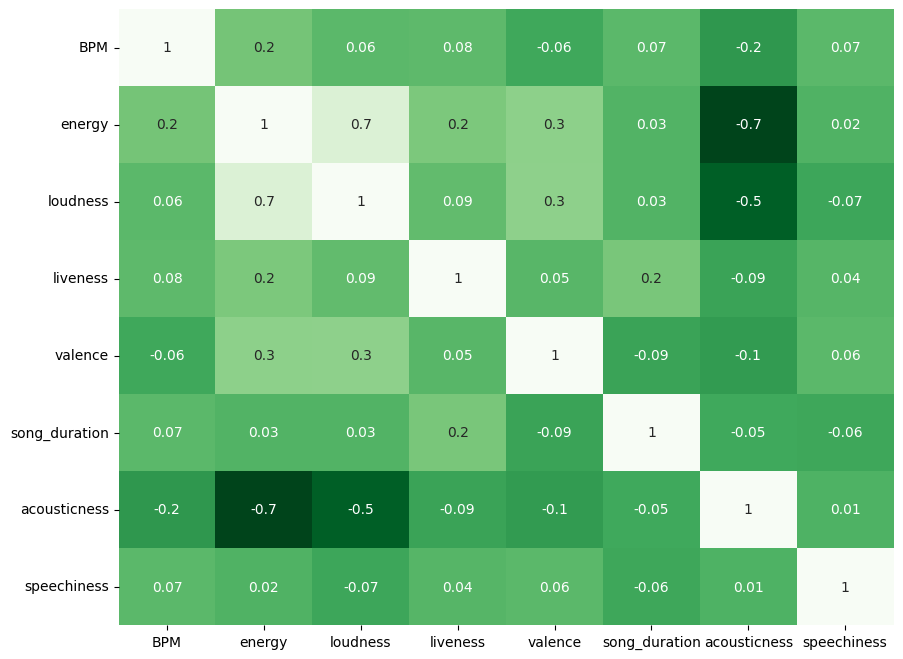

In [526]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(jointdf.select_dtypes(include='number').corr(), annot=True, fmt='.1g', cmap="Greens_r", cbar=False)


As we can see, two variables have a realtionship with one other variable. Specifically, energy and loudness both have a medium, negative correlation to acousticness of -0.6 and -0.5 respectively.

#### To get a closer look into the descriptive characteristic, we want to focus in on specific characteristic distributions. 

<Axes: xlabel='BPM'>

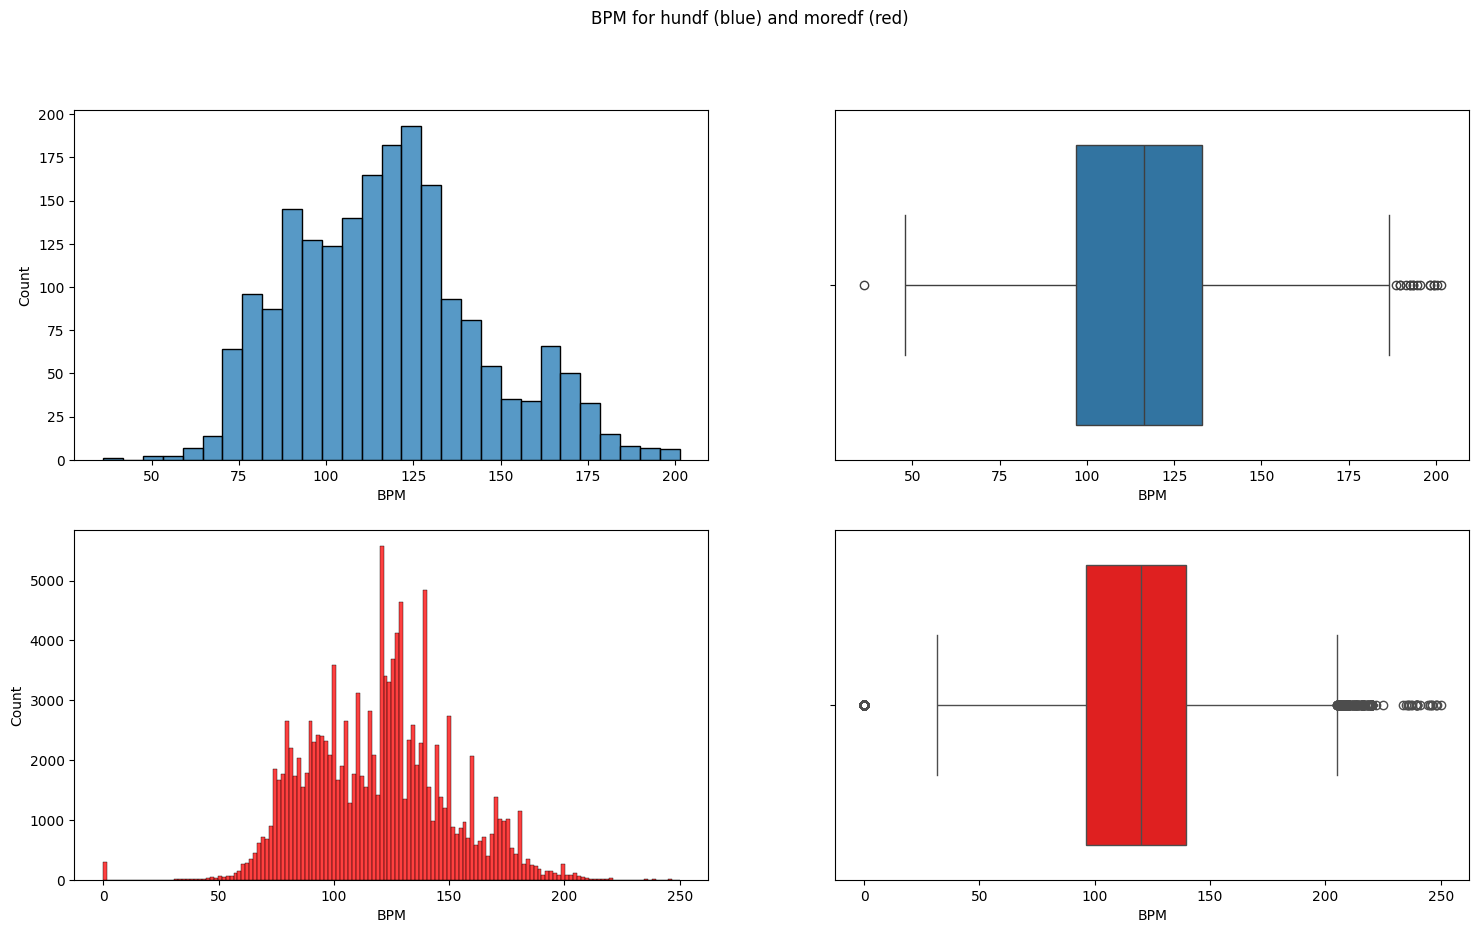

In [527]:
# Find distribution and any outliers for BPM in both datasets
fig1, axes1 = plt.subplots(2, 2, figsize=(18, 10))
fig1.suptitle('BPM for hundf (blue) and moredf (red)')

sns.histplot(ax=axes1[0,0], data=hundf, x='BPM') 
sns.boxplot(ax=axes1[0,1], data=hundf, x='BPM')
sns.histplot(ax=axes1[1,0], data=moredf, x='BPM', color='red') 
sns.boxplot(ax=axes1[1,1], data=moredf, x='BPM', color='red')

The distribution for BPM in both datasets seem to take on a traditional bell curve shape. However, we can see from the boxplots that both datasets have a a good amount of outliers, as can be seen by the individual points.

#### In order to remove outliers from our data and get a closer look at distributions we will need to caluclate the Q1, Q2, and IQR of each column in our datasets. We are going to keep observations that are within our quartiles. 

#### Quartiles work in relation to means and standard deviations so we would also like to have an understanding of what those values are as we interpret our graphs.

In [528]:
# Write a function that gets rid of the larger outliers to better analyze data.
def remove_outlier(dfin, col_name):
    q1 = dfin[col_name].quantile(0.25)
    q3 = dfin[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = dfin.loc[(dfin[col_name] > low) & (dfin[col_name] < high)]
    return df_out


<Axes: xlabel='BPM'>

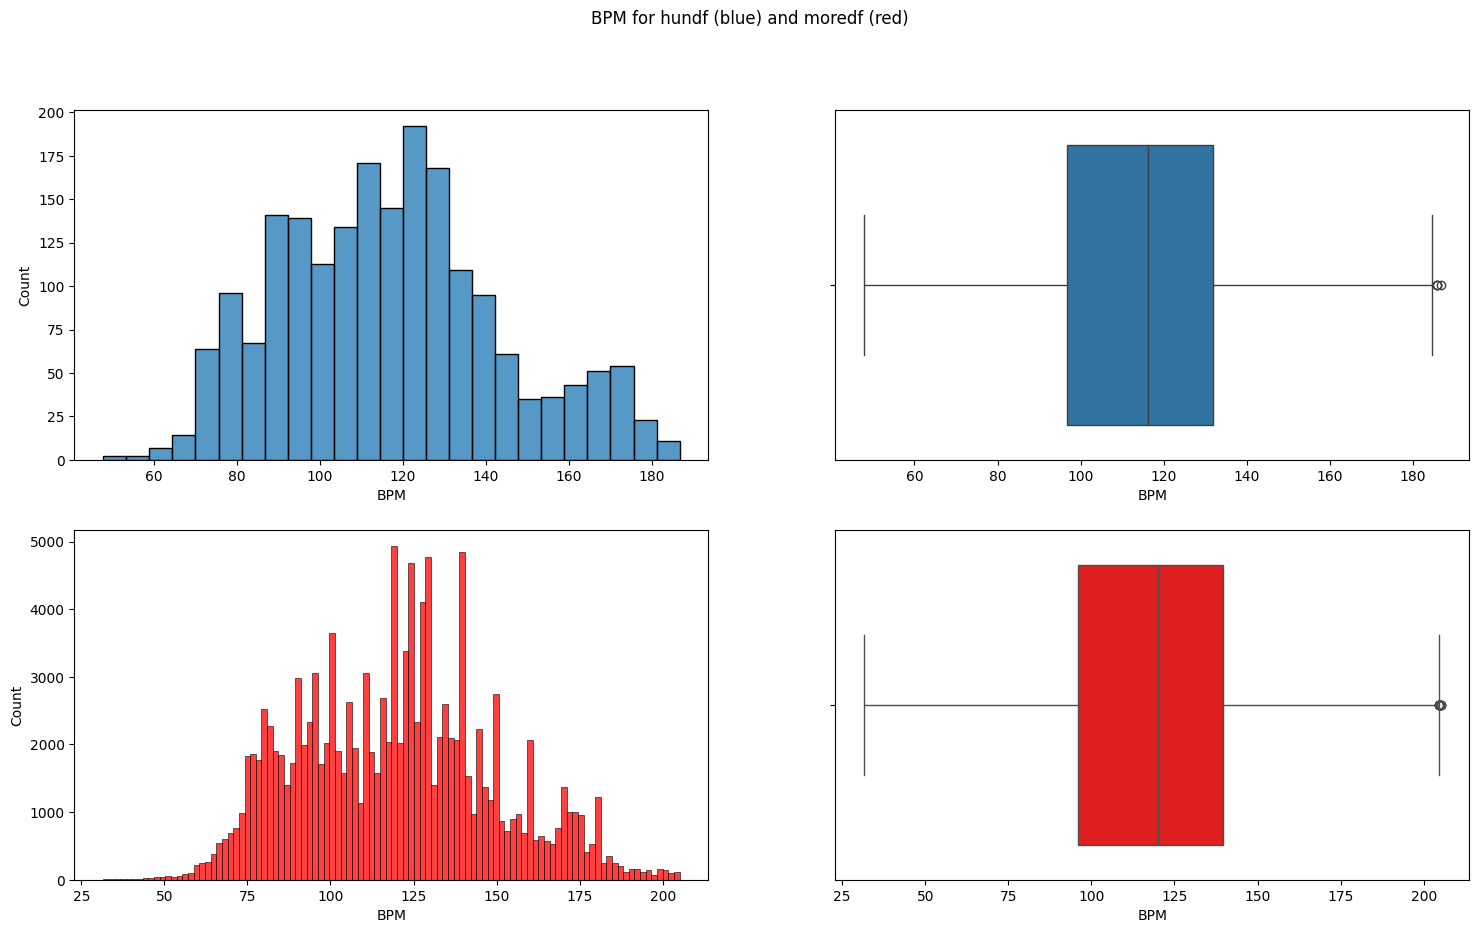

In [529]:
hundf = remove_outlier(hundf,'BPM')
moredf = remove_outlier(moredf,'BPM')
fig1, axes1 = plt.subplots(2, 2, figsize=(18, 10))
fig1.suptitle('BPM for hundf (blue) and moredf (red)')

sns.histplot(ax=axes1[0,0], data=hundf, x='BPM') 
sns.boxplot(ax=axes1[0,1], data=hundf, x='BPM')
sns.histplot(ax=axes1[1,0], data=moredf, x='BPM', color='red') 
sns.boxplot(ax=axes1[1,1], data=moredf, x='BPM', color='red')

Now, we can see that the plots' still retain the same distributions, but the boxplot does not include any extreme outliers.

#### Now we will want to visualize the rest of the song characteristics in our datasets.

In [530]:
# Write function that plots the hist and bar plots for a given variable in a dataset
def plot_var(column):
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    fig.suptitle(str(column) + ' for hundf (blue) and moredf (red)')

    sns.histplot(ax=axes[0,0], data=hundf, x=column) 
    sns.boxplot(ax=axes[0,1], data=hundf, x=column)
        
    sns.histplot(ax=axes[1,0], data=moredf, x=column, color='red') 
    sns.boxplot(ax=axes[1,1], data=moredf, x=column, color='red')

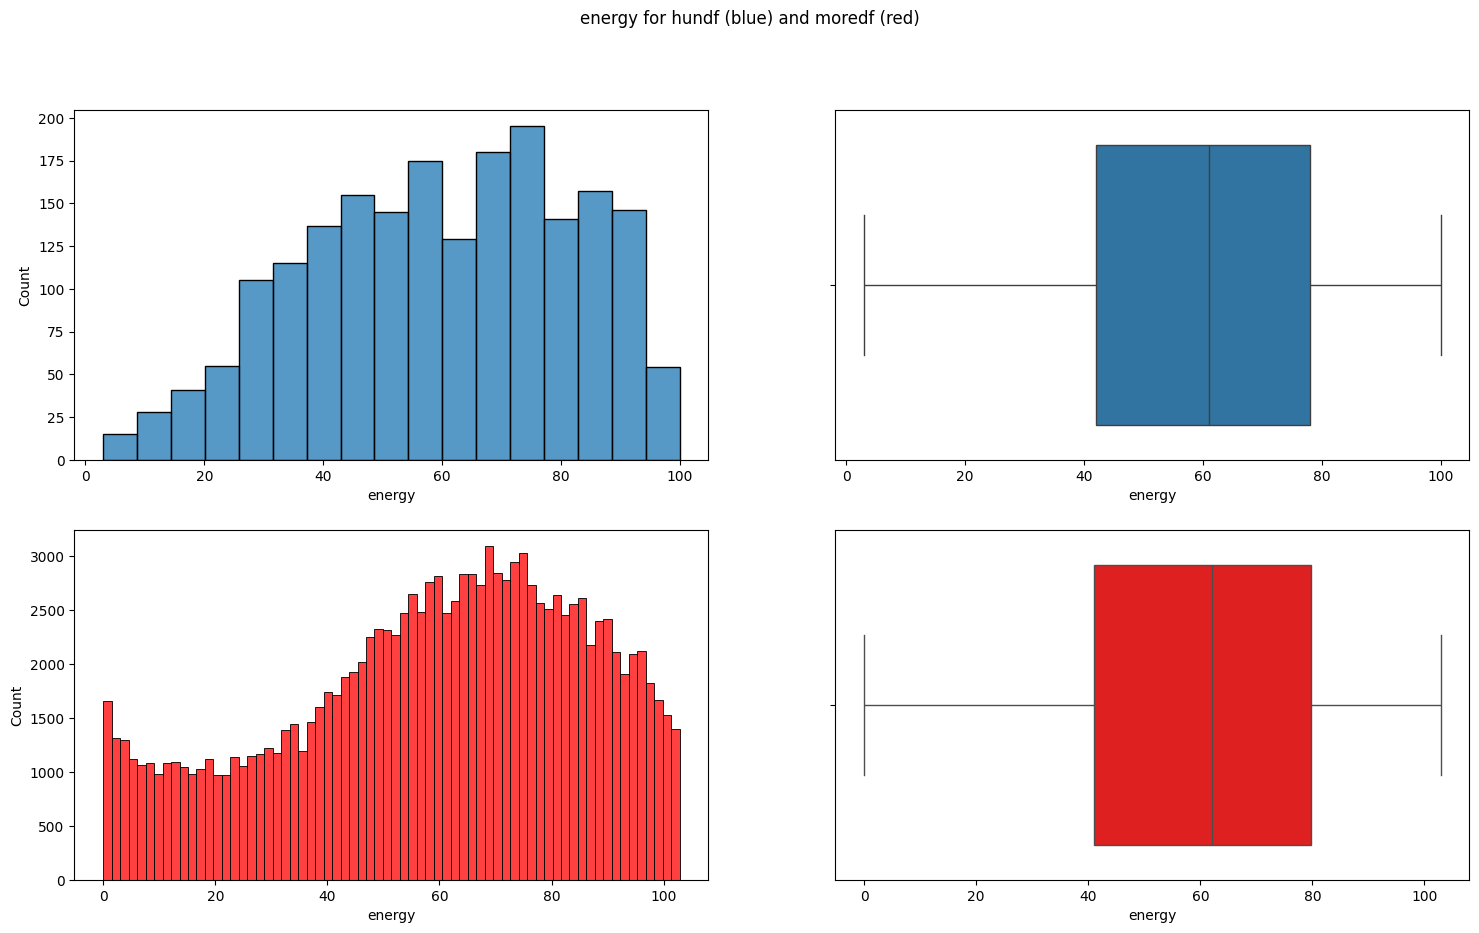

In [531]:
hundf = remove_outlier(hundf,'energy')
moredf = remove_outlier(moredf,'energy')
energy_plot = plot_var('energy')
energy_plot

In the plots above we see in the distribution of average energy in both songs part of the top 2000 streamed and not. We see that there is a relatively similar distribution. 

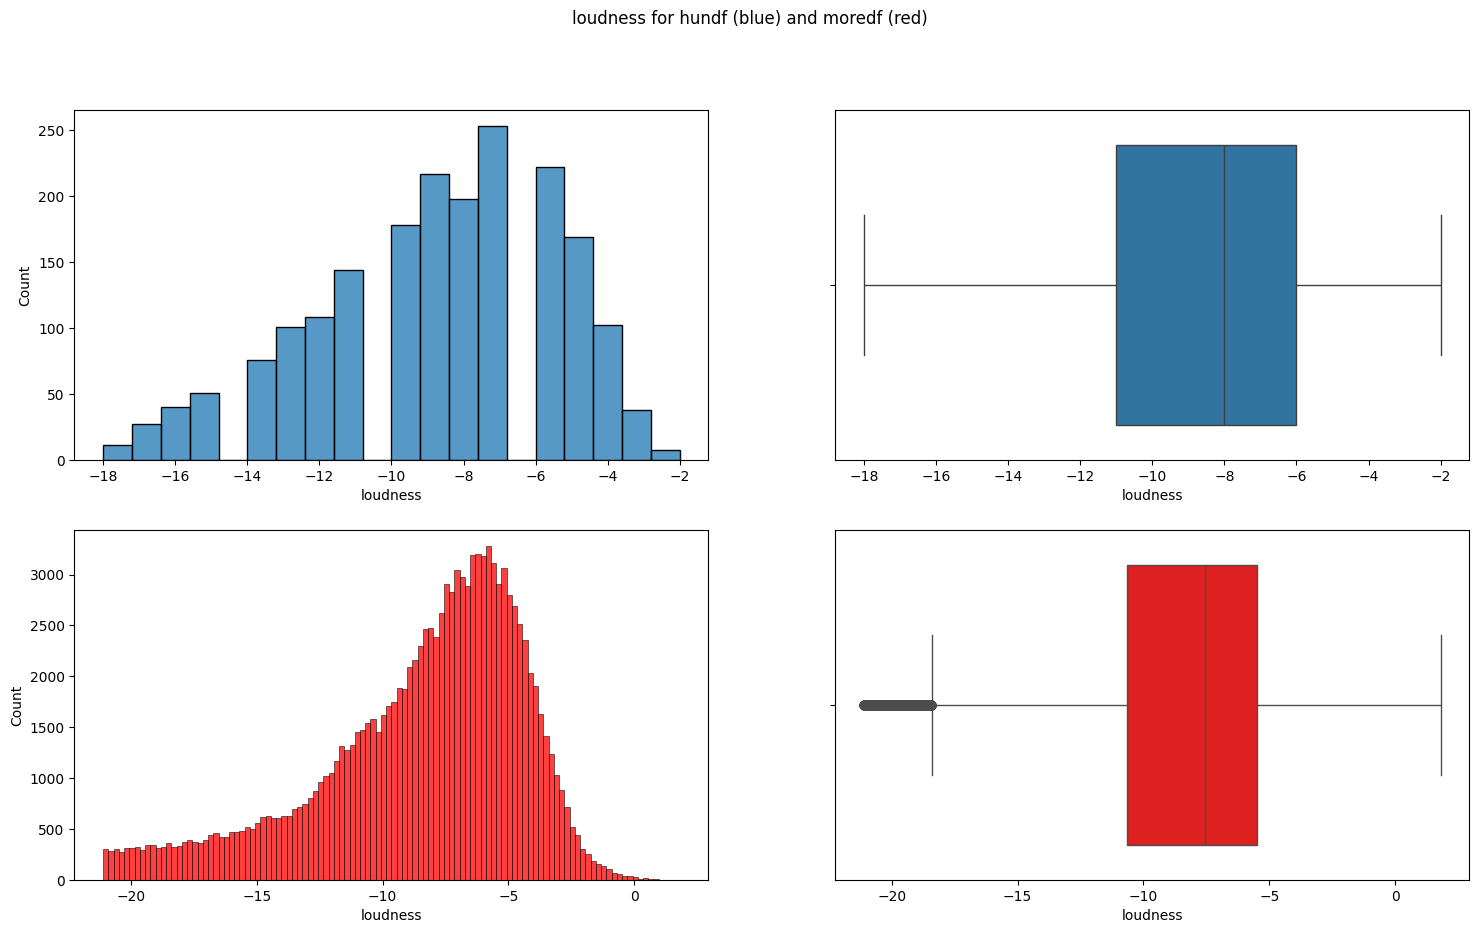

In [532]:
hundf = remove_outlier(hundf,'loudness')
moredf = remove_outlier(moredf,'loudness')
loudness_plot = plot_var('loudness')
loudness_plot

In the plots above we see in the distribution of average loudness in both songs part of the top 2000 streamed and not. We see that the songs in the top 2000 have a relatively lower loudness distribution in comparison to songs not in the top 2000.

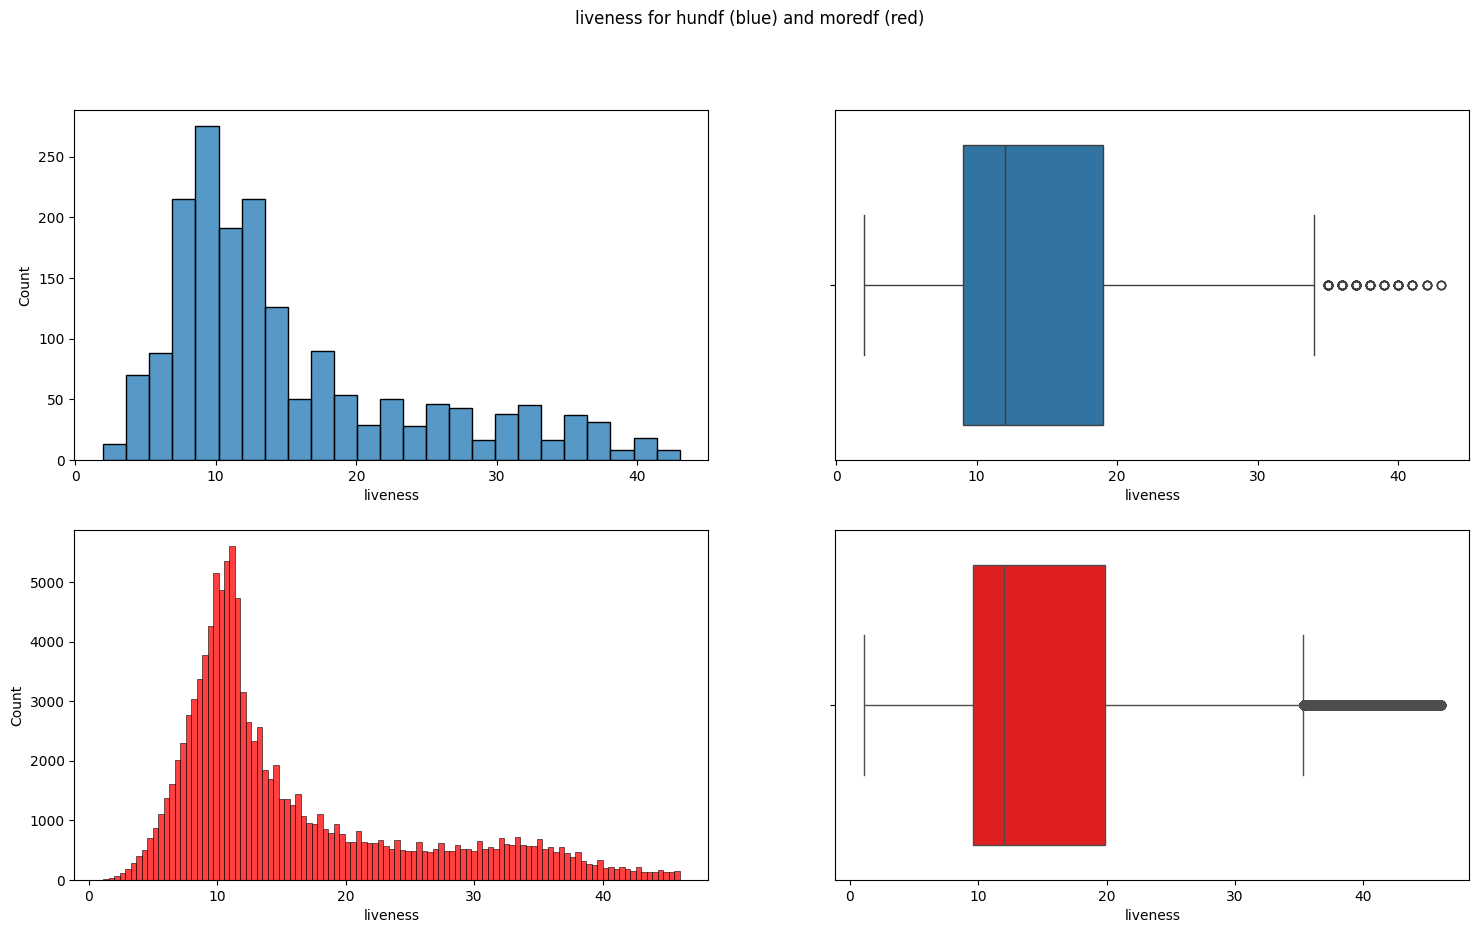

In [533]:
hundf = remove_outlier(hundf,'liveness')
moredf = remove_outlier(moredf,'liveness')
liveness_plot = plot_var('liveness')
liveness_plot

In the plots above we see in the distribution of average liveness in both songs part of the top 2000 streamed and not. We see that there is a relatively similar distribution.

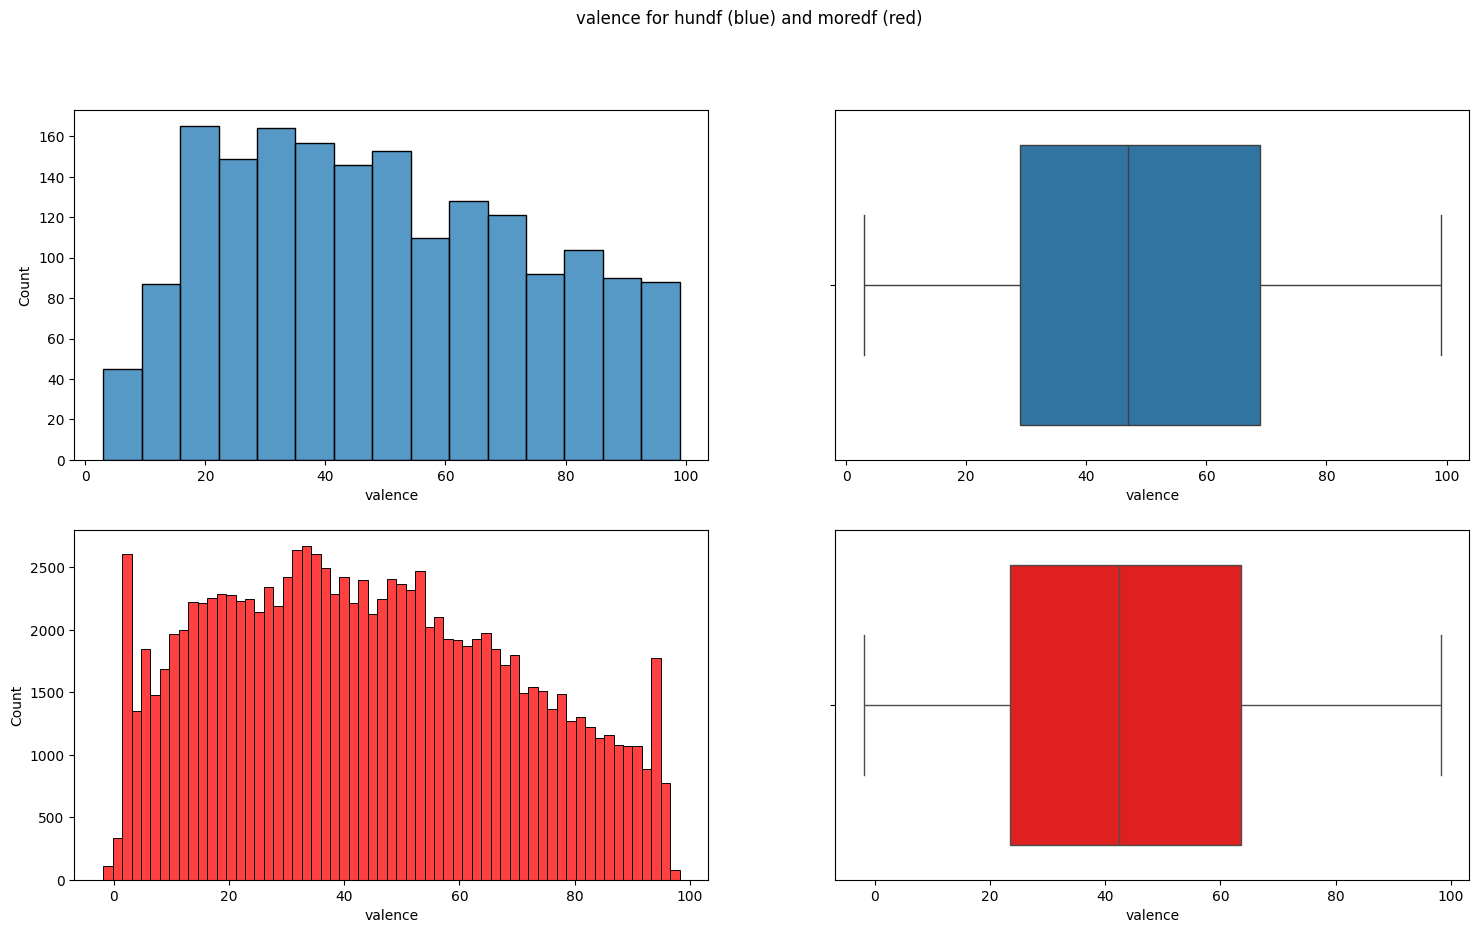

In [534]:
hundf = remove_outlier(hundf,'valence')
moredf = remove_outlier(moredf,'valence')
valence_plot = plot_var('valence')
valence_plot

In the plots above we see in the distribution of average valence in both songs part of the top 2000 streamed and not. We see that there is a relatively similar distribution.

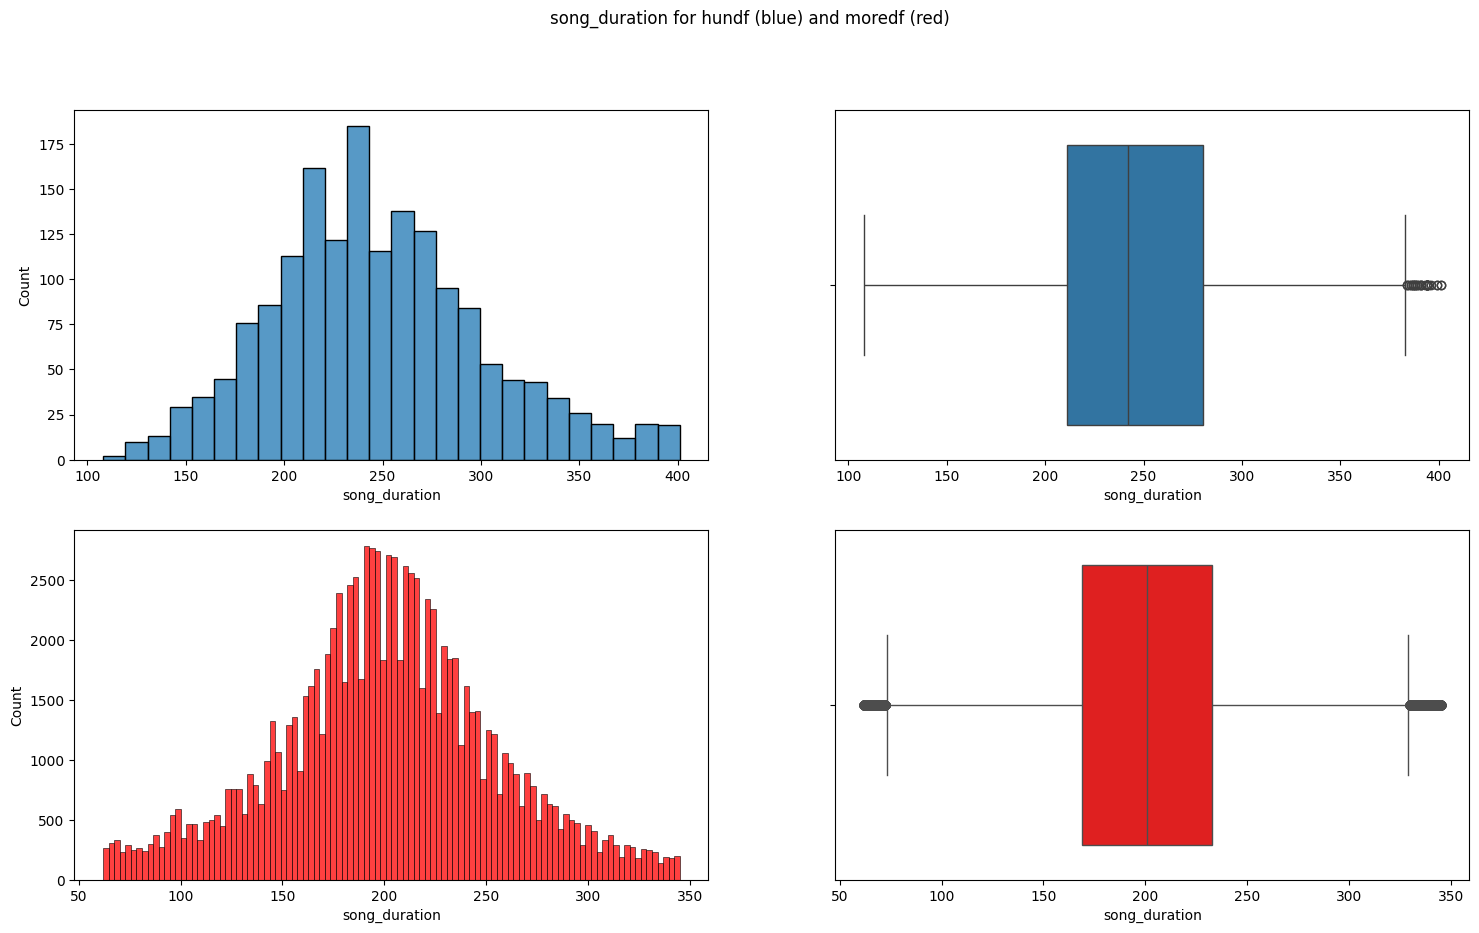

In [535]:
hundf = remove_outlier(hundf,'song_duration')
moredf = remove_outlier(moredf,'song_duration')
song_duration_plot = plot_var('song_duration')
song_duration_plot

In the plots above we see in the distribution of average song_duration in both songs part of the top 2000 streamed and not. We see that the songs in the top 2000 have a significantly larger average song duration over songs not in the top 2000.

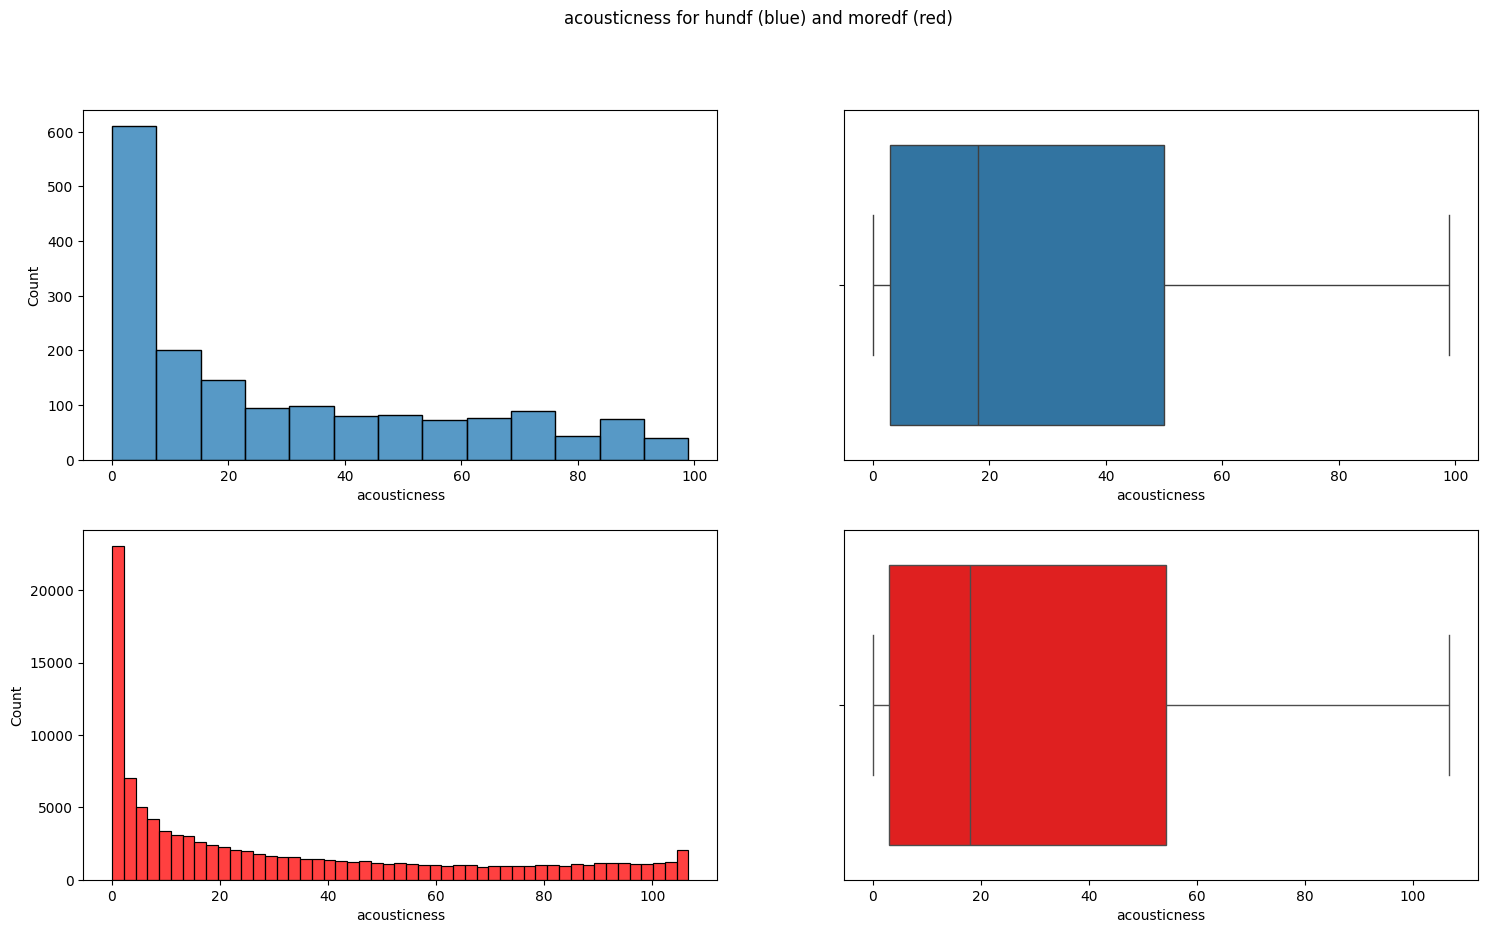

In [536]:
hundf = remove_outlier(hundf,'acousticness')
moredf = remove_outlier(moredf,'acousticness')
acousticness_plot = plot_var('acousticness')
acousticness_plot

In the plots above we see in the distribution of average acousticness in both songs part of the top 2000 streamed and not. We see that there is a relatively similar distribution.

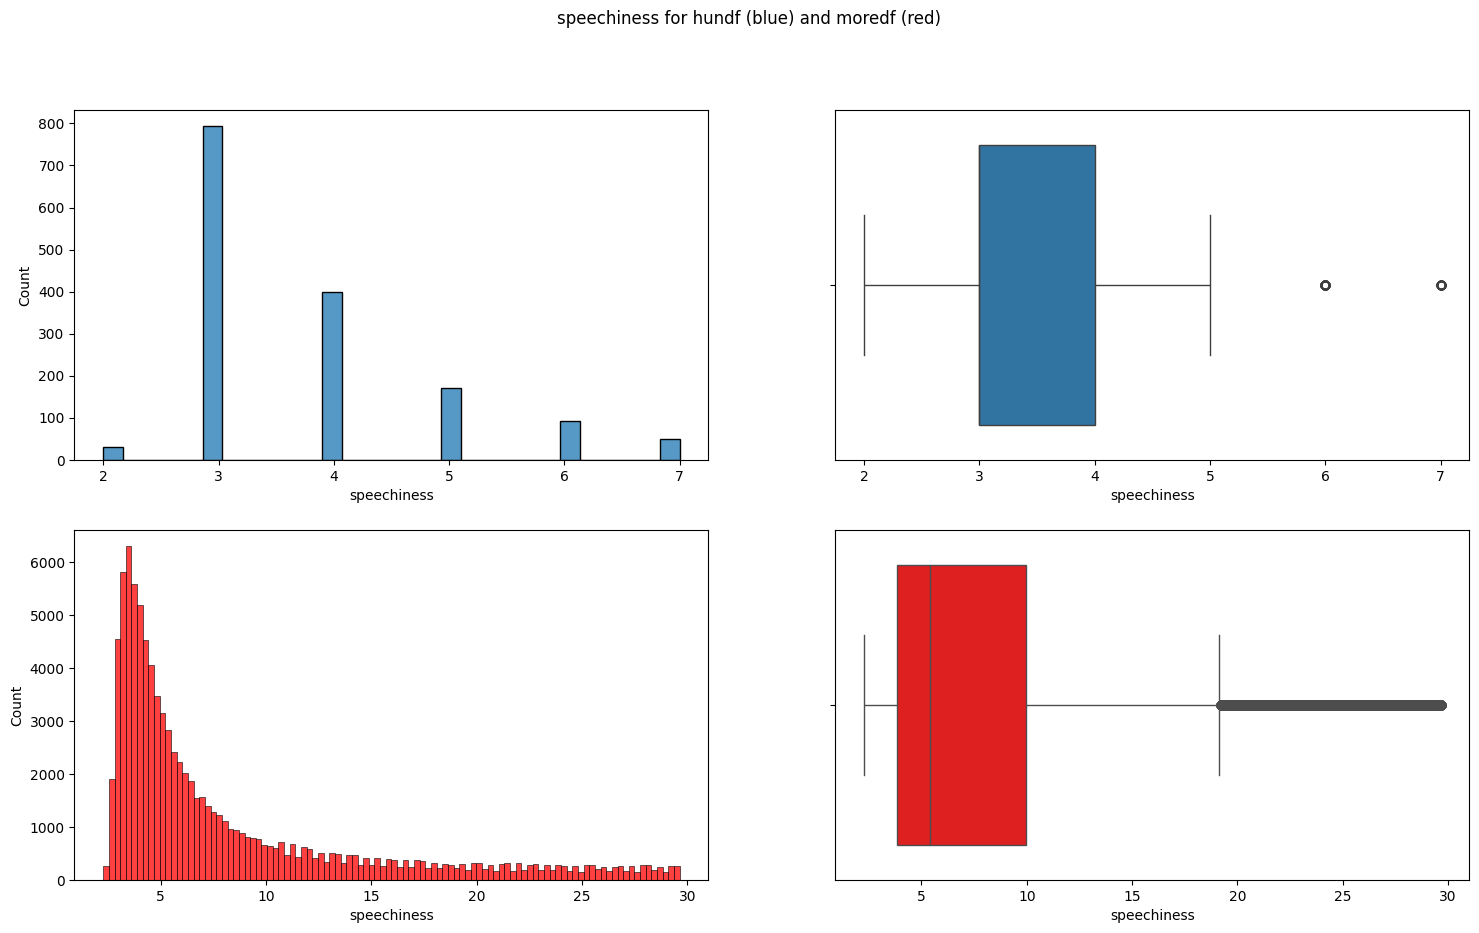

In [537]:
hundf = remove_outlier(hundf,'speechiness')
moredf = remove_outlier(moredf,'speechiness')
speechiness_plot = plot_var('speechiness')
speechiness_plot

In the plots above we see in the distribution of average speechiness in both songs part of the top 2000 streamed and not. We find that on average in songs in the top 2000 the amount of spoken words is less than those songs not in the top 2000.

#### Now, in order to analyze these distributions quantitatively, we will need to find the averages and standard deviations for each variable.

In [538]:
# Write function that calculates the means and standard deviations of each variable for both datasets
def avg_std(df):
    
    avg_std = {}
    
    for column in df.columns[2:-1]:
        avg = df[column].mean()
        std = df[column].std()
        value = str(avg) + ' ± ' + str(std)
        avg_std[column] = value
        
    return avg_std

hundf_avg_std = avg_std(hundf)
moredf_avg_std = avg_std(moredf)


In [539]:
hundf_avg_std

{'BPM': '116.19673842139598 ± 26.13013246262694',
 'energy': '58.199608610567516 ± 21.3929864511342',
 'loudness': '-8.989562948467057 ± 3.332903552195089',
 'liveness': '15.177429876060014 ± 8.932066615111147',
 'valence': '49.026744944553165 ± 24.87524884031659',
 'song_duration': '248.41943 ± 53.982235',
 'acousticness': '29.64840182648402 ± 29.319406602362715',
 'speechiness': '3.7677756033920415 ± 1.0867490849474786'}

In [540]:
moredf_avg_std

{'BPM': '121.07561766572373 ± 28.132377761193595',
 'energy': '62.339212550150044 ± 23.25131078290123',
 'loudness': '-8.278293123662216 ± 4.037283585062734',
 'liveness': '15.795926256574631 ± 9.340327973513334',
 'valence': '44.43710221466909 ± 25.401777743347044',
 'song_duration': '202.13510664615848 ± 53.79935513901999',
 'acousticness': '31.94165761366448 ± 33.796656862899695',
 'speechiness': '8.226943885727808 ± 6.513727841926653'}

There are large standard deviations in the variables for both data sets. This could be explained due to the diversity of music and songs included in our data.

In our analysis thus far we see that there is little significance in our findings. In order to continue searching we will split our dataset into two parts, a lower and upper, according to total number of streams. From here we will investigate if there are correlations between total number of streams and our other variables.

#### We can now find p-values to do comparative analysis between the two datasets.

In [541]:
# write function for p-value
def find_pval(df1, df2, var):
    
    t_val, p_val = ttest_ind(df1[var], df2[var])
    
    return p_val

In [542]:
# add these values 
column_names = hundf.columns[2:-1].tolist()

list_pval = {}

for var in column_names:
    
    list_pval[var] = find_pval(hundf, moredf, var)

print(list_pval)

{'BPM': np.float64(1.5663836336940334e-11), 'energy': np.float64(4.461048489058862e-12), 'loudness': np.float64(6.955183058307912e-12), 'liveness': np.float64(0.010073934758044505), 'valence': np.float64(2.2486186667204728e-12), 'song_duration': np.float64(2.760643651133621e-243), 'acousticness': np.float64(0.00828197079429571), 'speechiness': np.float64(1.3495465056408461e-157)}


A p-value of 0.05 or less signals a significant difference among the two datasets. As we can see, all variables show a value less than this threshold, meaning that there is significant difference. In other words, this tells us that the data for each variable is statistically different between the two datasets.

This is meaningful to us because it tells us that each stylistic element of a song impacts whether it will be in the top 2000 or not.

#### To further explore this concept, we split the songs by the number of streams they had, rather than if they were in the top 2000 or not. 

In [544]:
jointdf['totstream'] = jointdf['totstream'].str.replace(',', '', regex=False)
jointdf['totstream'] = pd.to_numeric(jointdf['totstream'], errors='coerce')

median_streams = jointdf['totstream'].median()

less_med = jointdf[jointdf['totstream'] < median_streams]
more_med = jointdf[jointdf['totstream'] >= median_streams]

#songs with more than 600,000 streams
#less6hunk = jointdf[jointdf['totstream']<600000]
#songs with less than 600,000 streams
#more6hunk = jointdf[jointdf['totstream']>=600000]

In [550]:
median_streams

np.float64(5229835.0)

We picked the arbitrary number of the median streams to mimic a scenario where an up and coming artist may set the goal of reaching this many streams.

In [545]:
#the lowest amount of streams in first data set is above the median
less_med['totstream'].min()

np.int64(4218201)

In [546]:
#the highest amount of streams in the second data set is below the median
more_med['totstream'].max()

np.int64(37799456)

#### Now we will find the averages for each variable.

In [547]:
moremed_avgstd = avg_std(more_med)
moremed_avgstd

{'BPM': '121.73976635514019 ± 28.36697866091681',
 'energy': '60.90504672897196 ± 21.652091740946638',
 'loudness': '-7.870607476635514 ± 3.892066458756898',
 'liveness': '17.31710280373832 ± 13.683174858049375',
 'valence': '45.74130841121496 ± 24.488128716692117',
 'song_duration': '202.56542056074767 ± 62.398333616253',
 'acousticness': '32.31392523364486 ± 32.194194844774486',
 'speechiness': '10.94233644859813 ± 11.796792321193482',
 'top2000': '0.16822429906542055 ± 0.3749424070556188'}

In [548]:
lessmed_avgstd = avg_std(less_med)
lessmed_avgstd

{'BPM': '114.28422535211268 ± 27.504450119967988',
 'energy': '62.456338028169014 ± 20.532918960902983',
 'loudness': '-7.582676056338028 ± 4.077045831310122',
 'liveness': '16.482769953051644 ± 12.266940667049148',
 'valence': '43.78253521126761 ± 23.882517884919892',
 'song_duration': '209.12206572769952 ± 58.153376671988276',
 'acousticness': '30.034741784037557 ± 30.368242715326357',
 'speechiness': '11.55 ± 12.919419929731935',
 'top2000': '0.17370892018779344 ± 0.37975147007461135'}

#### Lastly, we will find p-values to note any significant differences.

In [549]:
list_pval_med = {}

for var in column_names:
    
    list_pval_med[var] = find_pval(more_med, less_med, var)

print(list_pval_med)

{'BPM': np.float64(0.006084997029876234), 'energy': np.float64(0.4479324852303439), 'loudness': np.float64(0.4558105273898968), 'liveness': np.float64(0.5074966783753434), 'valence': np.float64(0.4032331433968611), 'song_duration': np.float64(0.26203167713139147), 'acousticness': np.float64(0.45221156585584577), 'speechiness': np.float64(0.6120207855495953)}


There are significant differences in the variables of loudness, valence, song duration, and speechiness.

This tells us that for an up and coming artist to reach a goal of median streams for a song, they must pay heavy attention to these stylistic elements.

# Ethics & Privacy

A possible issue in regards to privacy with the data we have proposed is in the data pre wrangling user interests are gathered. The counting of streams implies listener usage is tracked, monitored and quantified. The type of music one listens to can be closely related to one’s personality and in turn provide a means for companies to gain insight into a user’s interests. Permission to use the datasets will be gained prior to use through accessing data that has been officially released to the public and is covered under “fair use” for public analysis and discussion. 

Another possible bias could be the different socioeconomic statuses artists hold before gaining popularity. As discussed earlier, a new artist’s relative success rate depends on many factors, one including their ability to advertise their content and gain song exposure. Thus, it seems as though artists coming from wealthier backgrounds with a higher ability to advertise will predictably become more popular compared to those who are not as fortunate and cannot as easily find their target audiences. Thus, artists who have more intial wealth will be better able to build a fan base and consequently gain more streams. To combat this particular bias in the future, we can account for the ways current popular artists achieved their success, namely through early advertisement. For artists who began their career with extensive advertising through expensive means, we could somewhat weigh their data less compared to the artists who began their careers with less extravagant advertising.



# Conclusion & Discussion

This project was set out to see whether there are significant correlations between 8 numerical values of song characteristics and total number of streams a song has on Spotify. From the background research we hypothesized that there would be some sort of strong correlation between song characteristics and total streams. From the analysis it is aimed to determine the key elements that would predict the popularity,in terms of total streams, of a song.


In the initial analysis we determine the Pearson correlation between all the variables in the data. This was done to determine if there were any correlations between the different variables of song characteristics. It is found only slight negative correlations acousticness & energy and acousticness & loudness which informed us that in any future analysis we could assume that if a energy our loudness value was high the acousticness was lower. With this we were able to support our hypothesis however, we continued our analysis to find correlations between total amount of streams and the variables. We used our two datasets we were able to find slight differences in mean values between songs  a part of Spotifys top 2000 and songs not included in Spotifys top 2000. We noted that although we found slight differences in loudness, song duration and speechiness the large amount of observations from the songs not a part of Spotify’s top 2000 may skew our results. In order to specifically see the effect the variables have on total streams we computed the p values of each variable between the ~6000 most streamed songs and the ~6000 least streamed songs. The p values for loudness, valence, song_duration, and speechiness were less than 0.05 indicating a significant difference between the datasets. Thus we were able further support our hypothesis.


During the data cleaning while gaining an understanding of the variables we began noticing some limitations to the project. It is noted that the values of decibels (dB) can be dependent on the instrument used to take the measurements resulting in some precision differences. Additionally its recognized that all of the data was specific to the time in which it was scrapped from Spotifys website. Because of this at any time values such as stream totals can change. In the future there would great value in exploring correlations of song characteristics and other factors such as genre, streaming platform, and artists.
